In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

In [11]:
dataset = pd.read_csv("Electric_and_gas data.csv", index_col = 0)
dataset.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [12]:
dataset.index = pd.to_datetime(dataset.index)
dataset.columns = ["Energy Production"]

In [13]:
dataset.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


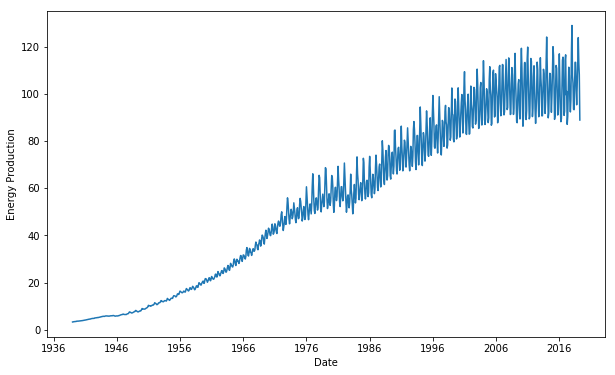

In [14]:
plt.xlabel("Date")
plt.ylabel("Energy Production")
plt.plot(dataset)

In [15]:
# Determining the rolling statistics
rolmean = dataset.rolling(window = 12).mean()
rolstd = dataset.rolling(window = 12).std()
print(rolmean, rolstd)

            Energy Production
DATE                         
1939-01-01                NaN
1939-02-01                NaN
1939-03-01                NaN
1939-04-01                NaN
1939-05-01                NaN
1939-06-01                NaN
1939-07-01                NaN
1939-08-01                NaN
1939-09-01                NaN
1939-10-01                NaN
1939-11-01                NaN
1939-12-01           3.582217
1940-01-01           3.614508
1940-02-01           3.648950
1940-03-01           3.679092
1940-04-01           3.707083
1940-05-01           3.737225
1940-06-01           3.767367
1940-07-01           3.797508
1940-08-01           3.827642
1940-09-01           3.853475
1940-10-01           3.881458
1940-11-01           3.915908
1940-12-01           3.950358
1941-01-01           3.984800
1941-02-01           4.019250
1941-03-01           4.055842
1941-04-01           4.096742
1941-05-01           4.137642
1941-06-01           4.180692
...                       ...
2016-11-01

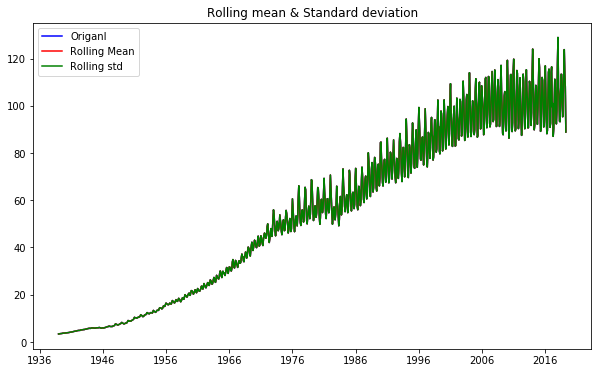

In [16]:
# Plot rolling statistics
orig = plt.plot(dataset, color = 'blue', label = 'Origanl')
mean = plt.plot(dataset, color = 'red', label = 'Rolling Mean')
std = plt.plot(dataset, color = 'green', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean & Standard deviation')
plt.show(block = False)

In [20]:
# Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller test..')
dftest = adfuller(dataset['Energy Production'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','Lags used','Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller test..
Test Statistic                  -0.245429
p-value                          0.932886
Lags used                       22.000000
Number of observations used    941.000000
Critical Value(1%)              -3.437318
Critical Value(5%)              -2.864616
Critical Value(10%)             -2.568408
dtype: float64


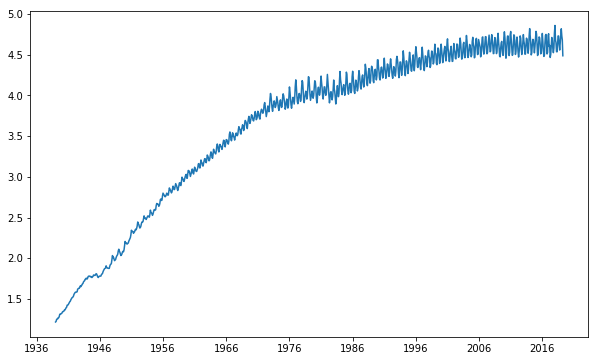

In [22]:
# Estimating Trend
dataset_logScale = np.log(dataset)
plt.plot(dataset_logScale)

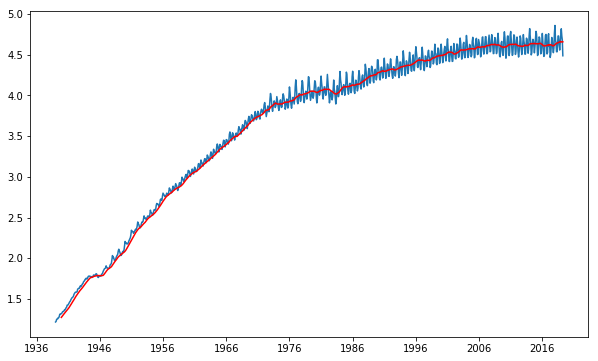

In [23]:
movingAverage = dataset_logScale.rolling(window = 12).mean()
movingSTD = dataset_logScale.rolling(window = 12).std()
plt.plot(dataset_logScale)
plt.plot(movingAverage, color = 'red')

In [24]:
dataLogScaleMinusMovingAverage = dataset_logScale - movingAverage
dataLogScaleMinusMovingAverage.head(5)

,Energy Production
DATE,
1939-01-01,NaN
1939-02-01,NaN
1939-03-01,NaN
1939-04-01,NaN
1939-05-01,NaN


In [25]:
dataLogScaleMinusMovingAverage.dropna(inplace = True)
dataLogScaleMinusMovingAverage.head(10)

,Energy Production
DATE,
1939-12-01,0.045241
1940-01-01,0.043097
1940-02-01,0.047152
1940-03-01,0.045680
1940-04-01,0.038071
1940-05-01,0.036585
1940-06-01,0.041786
1940-07-01,0.033733
1940-08-01,0.038847


In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Determine Rolling statistcs
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    # plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Orignal')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard deviation')
    plt.show(block = False)
    
    # Dickey Fuller test
    print('Results of Dickey Fuller test..')
    dftest = adfuller(dataset['Energy Production'], autolag = 'AIC')

    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','Lags used','Number of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key] = value
    
    print(dfoutput)

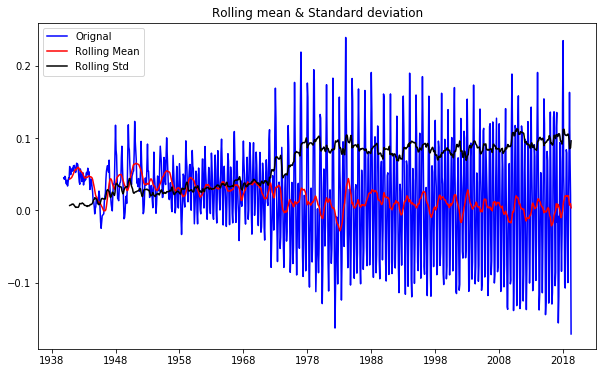

Results of Dickey Fuller test..
Test Statistic                  -0.245429
p-value                          0.932886
Lags used                       22.000000
Number of observations used    941.000000
Critical Value(1%)              -3.437318
Critical Value(5%)              -2.864616
Critical Value(10%)             -2.568408
dtype: float64


In [27]:
test_stationarity(dataLogScaleMinusMovingAverage)

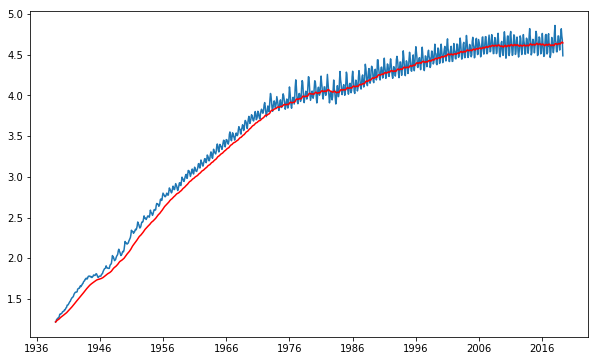

In [28]:
exponentialDecayWeightedAverage = dataset_logScale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(dataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

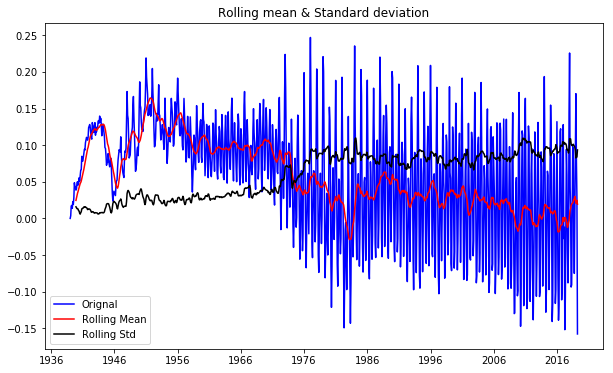

Results of Dickey Fuller test..
Test Statistic                  -0.245429
p-value                          0.932886
Lags used                       22.000000
Number of observations used    941.000000
Critical Value(1%)              -3.437318
Critical Value(5%)              -2.864616
Critical Value(10%)             -2.568408
dtype: float64


In [29]:
dataLogScaleMinusMovingExponentialDecayAverage = dataset_logScale - exponentialDecayWeightedAverage
test_stationarity(dataLogScaleMinusMovingExponentialDecayAverage)

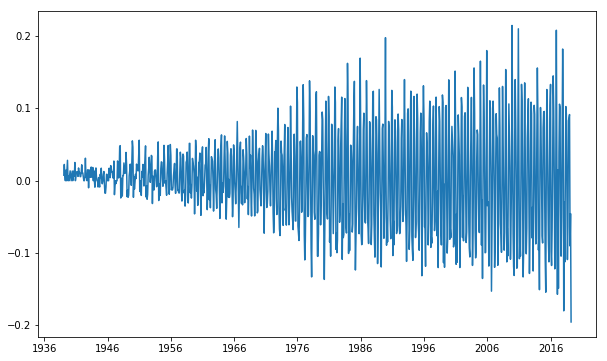

In [30]:
dataLogDiffShifting = dataset_logScale - dataset_logScale.shift()
plt.plot(dataLogDiffShifting)

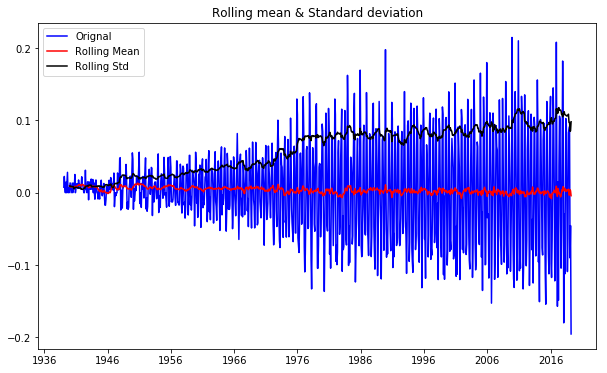

Results of Dickey Fuller test..
Test Statistic                  -0.245429
p-value                          0.932886
Lags used                       22.000000
Number of observations used    941.000000
Critical Value(1%)              -3.437318
Critical Value(5%)              -2.864616
Critical Value(10%)             -2.568408
dtype: float64


In [31]:
dataLogDiffShifting.dropna(inplace = True)
test_stationarity(dataLogDiffShifting)

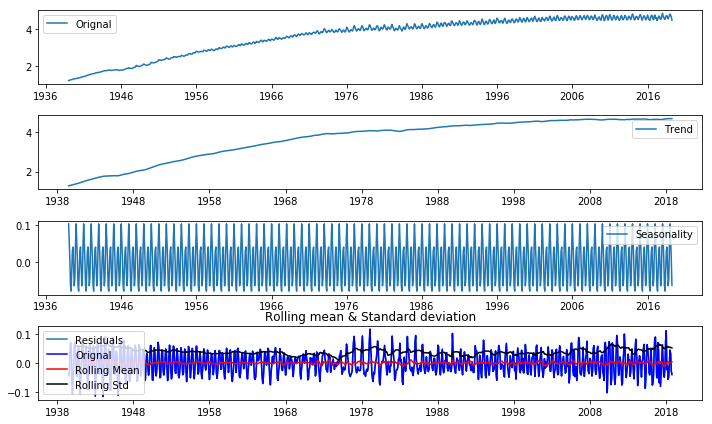

Results of Dickey Fuller test..
Test Statistic                  -0.245429
p-value                          0.932886
Lags used                       22.000000
Number of observations used    941.000000
Critical Value(1%)              -3.437318
Critical Value(5%)              -2.864616
Critical Value(10%)             -2.568408
dtype: float64


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dataset_logScale, label = 'Orignal')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)



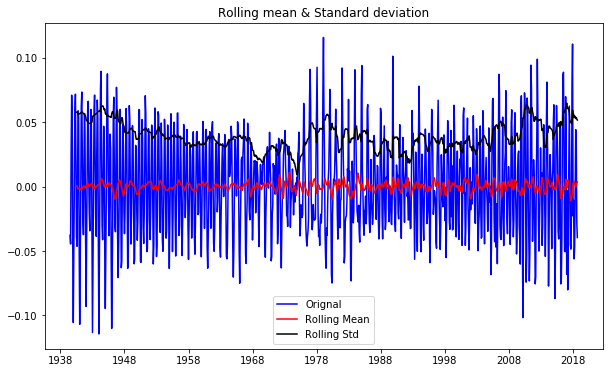

Results of Dickey Fuller test..
Test Statistic                  -0.245429
p-value                          0.932886
Lags used                       22.000000
Number of observations used    941.000000
Critical Value(1%)              -3.437318
Critical Value(5%)              -2.864616
Critical Value(10%)             -2.568408
dtype: float64


In [38]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

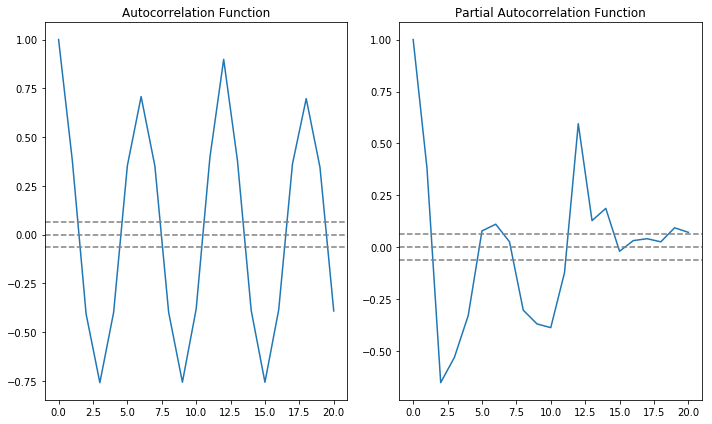

In [39]:
# ACF & PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(dataLogDiffShifting, nlags = 20)
lag_pacf = pacf(dataLogDiffShifting, nlags = 20, method = 'ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)),linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)),linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

No handles with labels found to put in legend.


Plotting AR Model


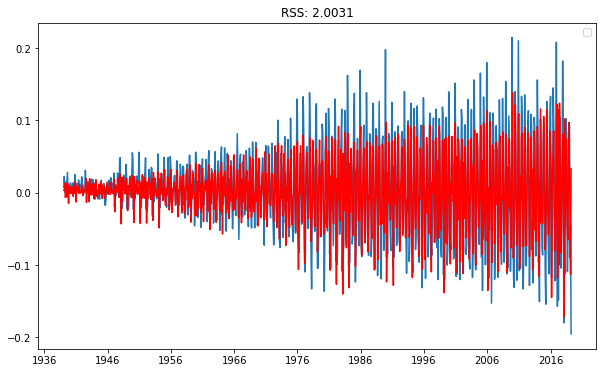

In [61]:
from statsmodels.tsa.arima_model import ARIMA

# AR model
model = ARIMA(dataset_logScale, order=(2, 1, 0)) 
results_AR = model.fit(disp=-1)  
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataLogDiffShifting['Energy Production'])**2))
print('Plotting AR Model')


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

No handles with labels found to put in legend.


Plotting AR Model


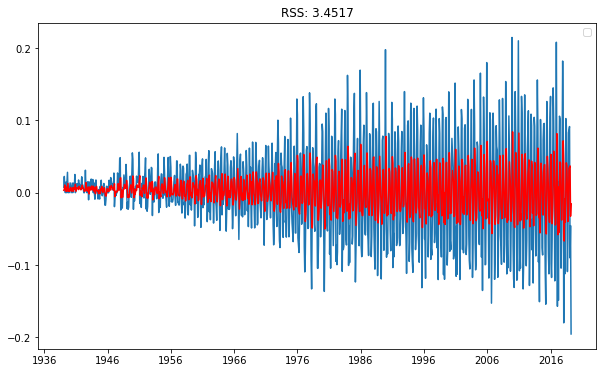

In [60]:
# MA Model
model = ARIMA(dataset_logScale, order=(1, 1, 0)) 
results_MA = model.fit(disp=-1)  
plt.plot(dataLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dataLogDiffShifting['Energy Production'])**2))
print('Plotting AR Model')

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



Text(0.5,1,'RSS: 2.0031')

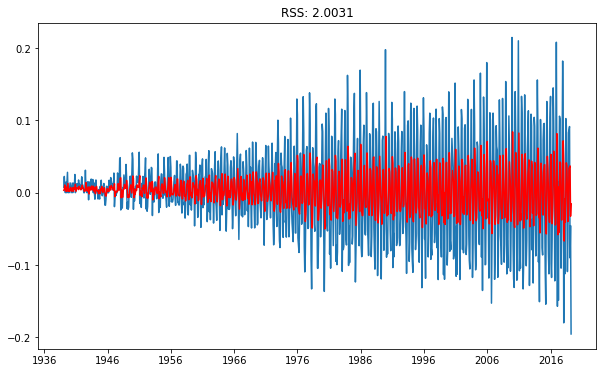

In [59]:
model = ARIMA(dataset_logScale, order = (1,1,0))
results_ARIMA = model.fit(disp = -1)
plt.plot(dataLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dataLogDiffShifting['Energy Production'])**2))

In [62]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

DATE
1939-02-01    0.003269
1939-03-01    0.004924
1939-04-01    0.010618
1939-05-01    0.004838
1939-06-01    0.002018
dtype: float64


In [63]:
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DATE
1939-02-01    0.003269
1939-03-01    0.008193
1939-04-01    0.018810
1939-05-01    0.023649
1939-06-01    0.025666
dtype: float64


In [70]:
predictions_ARIMA_log = pd.Series(np.ones(dataset_logScale.shape[0]) * np.log(dataset_logScale['Energy Production'])[0], index = dataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

DATE
1939-01-01    1.325275
1939-02-01    1.328543
1939-03-01    1.333467
1939-04-01    1.344085
1939-05-01    1.348923
dtype: float64

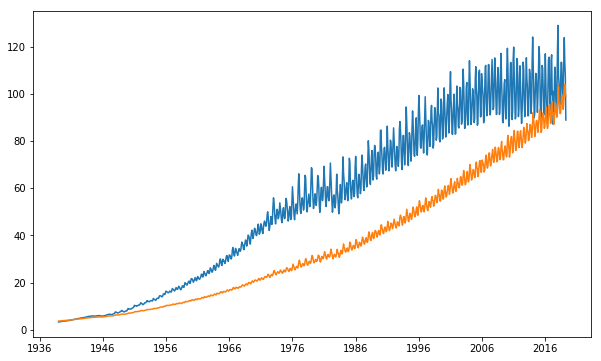

In [71]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dataset)
plt.plot(predictions_ARIMA)

In [72]:
dataset_logScale

,Energy Production
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556
1939-06-01,1.271164
1939-07-01,1.271164
1939-08-01,1.285562
1939-09-01,1.313724


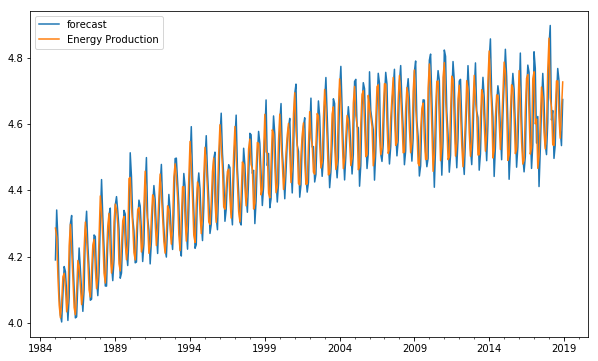

In [75]:
results_ARIMA.plot_predict(start = '1985-01-01', end = '2018-12-01')
x = results_ARIMA.forecast(steps = 396)


In [76]:
results_ARIMA.forecast(steps = 1360)

(array([ 4.41444315,  4.38862012,  4.38075602, ...,  8.80273263,
         8.80600117,  8.80926972]),
 array([ 0.05986896,  0.10216026,  0.13717691, ...,  3.57246165,
         3.57377778,  3.57509343]),
 array([[  4.29710214,   4.53178416],
        [  4.1883897 ,   4.58885055],
        [  4.11189421,   4.64961783],
        ..., 
        [  1.80083646,  15.8046288 ],
        [  1.80152543,  15.81047692],
        [  1.80221535,  15.81632408]]))